<a href="https://colab.research.google.com/github/bala-ceg/backtest-strategies/blob/main/weeklyexpiry_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Import Necessary Libs

In [48]:
!pip install nsepython

In [49]:
from nsepython import *

## NIFTY OI sample snippet

In [156]:
symbol = "NIFTY"
start_date = "29-03-2019"
end_date ="02-04-2019"
instrumentType = "options"
expiry_date ="04-Apr-2019"
put_df = derivative_history(symbol,start_date,end_date,instrumentType,expiry_date,strikePrice="",optionType="PE")
call_df = derivative_history(symbol,start_date,end_date,instrumentType,expiry_date,strikePrice="",optionType="CE")
if not put_df.empty:
  put_df['FH_OPEN_INT'] = put_df['FH_OPEN_INT'].astype(int)
  put_df['FH_TOT_TRADED_QTY'] = put_df['FH_TOT_TRADED_QTY'].astype(int)
  put_df = put_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
  underlying_value = put_df['FH_UNDERLYING_VALUE'].iloc[0]

if not call_df.empty:
  call_df['FH_OPEN_INT'] = call_df['FH_OPEN_INT'].astype(int)
  call_df['FH_TOT_TRADED_QTY'] = call_df['FH_TOT_TRADED_QTY'].astype(int)
  call_df = call_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
  underlying_value = call_df['FH_UNDERLYING_VALUE'].iloc[0]

In [157]:
put_total_open_int = put_df['FH_OPEN_INT'].sum()
put_total_volume = put_df['FH_TOT_TRADED_QTY'].sum()

put_df['FH_OPEN_INT_PERCENTAGE'] = (put_df['FH_OPEN_INT'] / put_total_open_int) * 100

put_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','FH_OPEN_INT_PERCENTAGE']].head(5)

,FH_STRIKE_PRICE,FH_OPEN_INT,FH_OPEN_INT_PERCENTAGE
33,11500,1444275,13.969836
31,11600,1433850,13.869000
29,11700,1172400,11.340109
43,11000,1093725,10.579120
35,11400,1080825,10.454344


In [158]:
put_df['FH_STRIKE_PRICE'] = put_df['FH_STRIKE_PRICE'].astype(float)
put_df['ABS_DIFF'] = abs(put_df['FH_STRIKE_PRICE'] - float(underlying_value))

sorted_put_df = put_df.sort_values(by='ABS_DIFF')

closest_rows = sorted_put_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE','FH_TOT_TRADED_QTY']]

print(closest_rows.head(3))
print(underlying_value)
put_df['FH_OPEN_INT'].idxmax()
row_with_max_open_int = put_df.loc[put_df['FH_OPEN_INT'].idxmax()]
row_with_max_open_int['FH_OPEN_INT']
near_strike_put_open_int = closest_rows['FH_OPEN_INT'].head(3).sum()
print(near_strike_put_open_int)
near_strike_put_vol = closest_rows['FH_TOT_TRADED_QTY'].head(3).sum()
print(near_strike_put_vol)

    FH_STRIKE_PRICE  FH_OPEN_INT  ABS_DIFF  FH_OPEN_INT_PERCENTAGE  \
29          11700.0      1172400      13.2               11.340109   
28          11750.0       211500      36.8                2.045746   
30          11650.0       601200      63.2                5.815143   

    FH_TOT_TRADED_QTY  
29           19569150  
28            1409775  
30            8207025  
11713.2
1985100
29185950


In [159]:
call_total_open_int = call_df['FH_OPEN_INT'].sum()
call_total_volume = call_df['FH_TOT_TRADED_QTY'].sum()

call_df['FH_OPEN_INT_PERCENTAGE'] = (call_df['FH_OPEN_INT'] / call_total_open_int) * 100

call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','FH_OPEN_INT_PERCENTAGE']].head(5)


,FH_STRIKE_PRICE,FH_OPEN_INT,FH_OPEN_INT_PERCENTAGE
25,11900,1539825,17.438463
27,11800,1517475,17.185350
29,11700,1096650,12.419522
23,12000,1022475,11.579493
13,12500,665925,7.541577


In [160]:
call_df['FH_STRIKE_PRICE'] = call_df['FH_STRIKE_PRICE'].astype(float)
call_df['ABS_DIFF'] = abs(call_df['FH_STRIKE_PRICE'] - float(underlying_value))

# Sort by the absolute difference
sorted_call_df = call_df.sort_values(by='ABS_DIFF')

# Select the rows that are closest to the underlying value
closest_rows = sorted_call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE','FH_TOT_TRADED_QTY']]

print(closest_rows.head(3))
print(underlying_value)
call_df['FH_OPEN_INT'].idxmax()
row_with_max_open_int = call_df.loc[call_df['FH_OPEN_INT'].idxmax()]
row_with_max_open_int['FH_OPEN_INT']
near_strike_call_open_int = closest_rows['FH_OPEN_INT'].head(3).sum()
print(near_strike_call_open_int)
near_strike_call_vol = closest_rows['FH_TOT_TRADED_QTY'].head(3).sum()
print(near_strike_call_vol)

    FH_STRIKE_PRICE  FH_OPEN_INT  ABS_DIFF  FH_OPEN_INT_PERCENTAGE  \
29          11700.0      1096650      13.2               12.419522   
28          11750.0       614850      36.8                6.963154   
30          11650.0       146850      63.2                1.663071   

    FH_TOT_TRADED_QTY  
29           25219200  
28            8684100  
30            2838750  
11713.2
1858350
36742050


In [161]:
pcr = float(put_total_open_int/call_total_open_int)
print("PCR OI:",pcr)
pcr_vol = float(put_total_volume/call_total_volume)
print("PCR volume:",pcr_vol)

PCR OI: 1.1708342534866734
PCR volume: 0.8627925922693085


In [162]:
near_pcr = float(near_strike_put_open_int/near_strike_call_open_int)
print("Near PCR OI:",near_pcr)
near_pcr_vol = float(near_strike_put_vol/near_strike_call_vol)
print("Near PCR volume:",pcr_vol)

Near PCR OI: 1.068205666316894
Near PCR volume: 0.8627925922693085


In [103]:
call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE']].head(15)

,FH_STRIKE_PRICE,FH_OPEN_INT,ABS_DIFF,FH_OPEN_INT_PERCENTAGE
23,22500.0,10505750,299.45,10.220754
27,22300.0,7514425,99.45,7.310577
21,22600.0,6759925,399.45,6.576545
13,23000.0,6750675,799.45,6.567546
29,22200.0,6618650,0.55,6.439102
25,22400.0,6395500,199.45,6.222006
19,22700.0,5450125,499.45,5.302276
17,22800.0,5378600,599.45,5.232692
22,22550.0,4684575,349.45,4.557494
28,22250.0,4609375,49.45,4.484334


In [ ]:
call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT']]

,FH_STRIKE_PRICE,FH_OPEN_INT
23,22500.0,10505750
27,22300.0,7514425
21,22600.0,6759925
13,23000.0,6750675
29,22200.0,6618650
...,...,...
65,20400.0,1000
52,21050.0,875
57,20800.0,625
55,20900.0,450


In [40]:
import pandas as pd
historic_nifty_df = pd.read_csv('/content/Nifty50_5Ydata.csv')
historic_nifty_df['Date'] = pd.to_datetime(historic_nifty_df['Date'], format="%d-%m-%Y")
numeric_columns = ["Open", "High", "Low", "Price"]
for column in numeric_columns:
    historic_nifty_df[column] = historic_nifty_df[column].str.replace(",", "").astype(float)
historic_nifty_df['Change %'] = historic_nifty_df['Change %'].str.replace("%", "").astype(float)
historic_nifty_df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-06-20,23567.00,23586.15,23624.00,23442.60,280.34B,0.22
1,2024-06-19,23516.00,23629.85,23664.00,23412.90,328.81B,-0.18
2,2024-06-18,23557.90,23570.80,23579.05,23499.70,272.21B,0.39
3,2024-06-14,23465.60,23464.95,23490.40,23334.25,223.09B,0.29
4,2024-06-13,23398.90,23480.95,23481.05,23353.90,268.28B,0.33
...,...,...,...,...,...,...,...
1290,2019-04-04,11598.00,11660.20,11662.55,11559.20,349.03B,-0.39
1291,2019-04-03,11643.95,11735.30,11761.00,11629.15,365.76B,-0.59
1292,2019-04-02,11713.20,11711.55,11729.35,11655.85,386.13B,0.38
1293,2019-04-01,11669.15,11665.20,11738.10,11644.75,379.57B,0.39


In [ ]:
data = historic_nifty_df.copy()
data['Day_of_Week'] = data['Date'].dt.dayofweek
data = data[['Date', 'Price', 'Day_of_Week','Change %']]
data['Week_Number'] = data['Date'].dt.isocalendar().week
data['Year'] = data['Date'].dt.isocalendar().year

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'}
data['Day_of_Week'] = data['Day_of_Week'].map(day_map)

pivoted_data_1 = data.pivot_table(index=['Year', 'Week_Number'], columns='Day_of_Week', values='Price')
pivoted_data_2 = data.pivot_table(index=['Year', 'Week_Number'], columns='Day_of_Week', values='Change %')

In [ ]:
pivoted_data_1.columns.name = None
pivoted_data_1.reset_index(inplace=True)


pivoted_data_2.columns.name = None
pivoted_data_2.reset_index(inplace=True)

pivoted_data_1['Friday'] = pivoted_data_1['Friday'].shift(1)

pivoted_data_1 = pivoted_data_1[['Year','Week_Number', 'Friday', 'Monday', 'Tuesday',  'Wednesday','Thursday']]
pivoted_data_1 = pivoted_data_1.dropna(thresh=pivoted_data_1.shape[1] - 5 + 1)
pivoted_data_1['Thursday'].fillna(pivoted_data_1['Wednesday'], inplace=True)

pivoted_data_2['Friday'] = pivoted_data_2['Friday'].shift(1)

pivoted_data_2 = pivoted_data_2[['Year','Week_Number', 'Friday', 'Monday', 'Tuesday',  'Wednesday','Thursday']]
pivoted_data_2 = pivoted_data_2.dropna(thresh=pivoted_data_2.shape[1] - 5 + 1)
pivoted_data_2['Thursday'].fillna(pivoted_data_2['Wednesday'], inplace=True)

In [ ]:
len(pivoted_data_1)

273

In [ ]:
pivoted_data_1

In [ ]:
pivoted_data_2['Year_Week'] = pivoted_data_2['Year'].astype(str) + '_' + pivoted_data_2['Week_Number'].astype(str)
#pivoted_data_3 = pivoted_data_2[pivoted_data_2['Year'] == 2024]
pivoted_data_3 = pivoted_data_2
print(len(pivoted_data_3))
len(pivoted_data_3[(pivoted_data_3['Thursday'] < 0.5) & (pivoted_data_3['Thursday'] > -0.5)])

273


120

In [ ]:
pivoted_data_3.to_csv('pivotdata.csv')

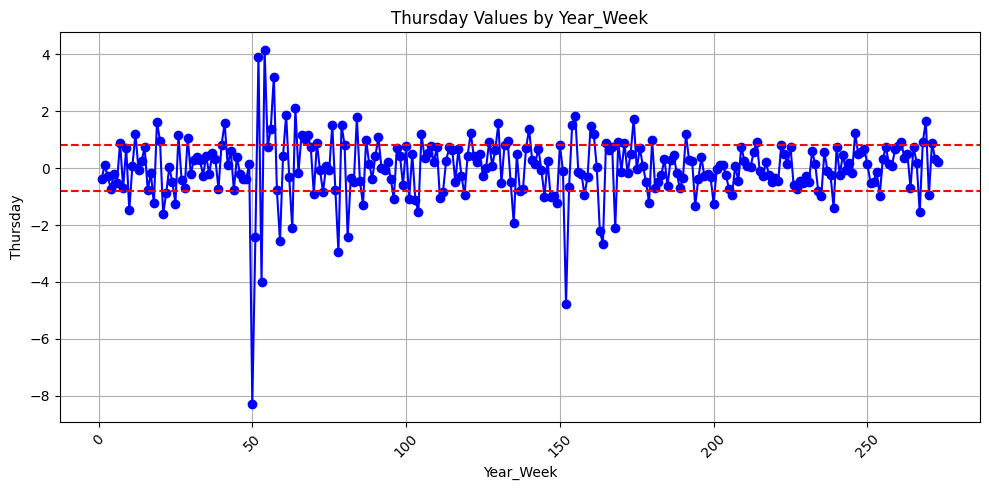

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(pivoted_data_3['Thursday'], marker='o', linestyle='-', color='b')
plt.xlabel('Year_Week')
plt.ylabel('Thursday')
plt.title('Thursday Values by Year_Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.axhline(y=0.8, color='red', linestyle='--')
plt.axhline(y=-0.8, color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
historic_vix_df = pd.read_csv('/content/IndiaVIX_5Ydata.csv')
print(historic_vix_df.head(5))
historic_vix_df['Change %'] = historic_vix_df['Change %'].str.replace("%", "").astype(float)
historic_vix_df = historic_vix_df.rename(columns={'Change %': 'vix_change', 'Price': 'vix_close','Date ': 'Date'})
historic_vix_df = historic_vix_df[['Date', 'vix_change', 'vix_close']]
historic_vix_df.describe()

         Date    Price     Open     High      Low  Vol. Change %
0  20-06-2024  13.3450  13.7125  14.0600  13.1025   NaN   -2.68%
1  19-06-2024  13.7125  12.9650  13.8150  11.6300   NaN    5.77%
2  18-06-2024  12.9650  12.8225  13.4200  12.6250   NaN    1.11%
3  14-06-2024  12.8225  13.4875  13.4875  12.6550   NaN   -4.93%
4  13-06-2024  13.4875  14.3875  14.3875  13.3125   NaN   -6.26%


,vix_change,vix_close
count,1293.000000,1293.000000
mean,0.127657,18.456154
std,5.457904,7.995114
min,-29.770000,10.135000
25%,-2.790000,13.622500
50%,-0.390000,16.647500
75%,2.340000,20.845000
max,30.790000,83.607500
